<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/Time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('AirPassengers.csv')
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [82]:
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [83]:
df['Month']

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
5      1949-06
6      1949-07
7      1949-08
8      1949-09
9      1949-10
10     1949-11
11     1949-12
12     1950-01
13     1950-02
14     1950-03
15     1950-04
16     1950-05
17     1950-06
18     1950-07
19     1950-08
20     1950-09
21     1950-10
22     1950-11
23     1950-12
24     1951-01
25     1951-02
26     1951-03
27     1951-04
28     1951-05
29     1951-06
        ...   
114    1958-07
115    1958-08
116    1958-09
117    1958-10
118    1958-11
119    1958-12
120    1959-01
121    1959-02
122    1959-03
123    1959-04
124    1959-05
125    1959-06
126    1959-07
127    1959-08
128    1959-09
129    1959-10
130    1959-11
131    1959-12
132    1960-01
133    1960-02
134    1960-03
135    1960-04
136    1960-05
137    1960-06
138    1960-07
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

In [84]:
date_format = lambda x: pd.datetime.strptime(x, "%Y-%m")

df = pd.read_csv("AirPassengers.csv", parse_dates = ['Month'], index_col = 'Month',date_parser = date_format)

df.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [85]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [0]:
ts = df['#Passengers'].head(10)

In [87]:
# Indexing techniques for TS data
ts['1949-01-01']  # Accessing a single value by indexing

112

In [88]:
ts['1949-01-01':'1949-05-01'] # or ts[:'1949-05-01'] # if you want all values till May 1949

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [89]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

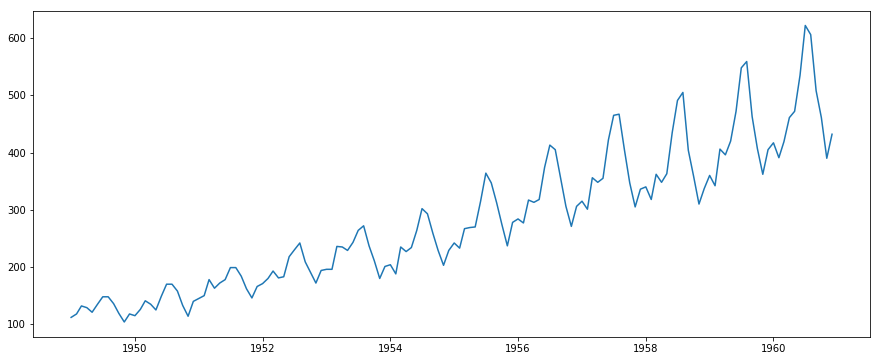

In [90]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.plot(df)

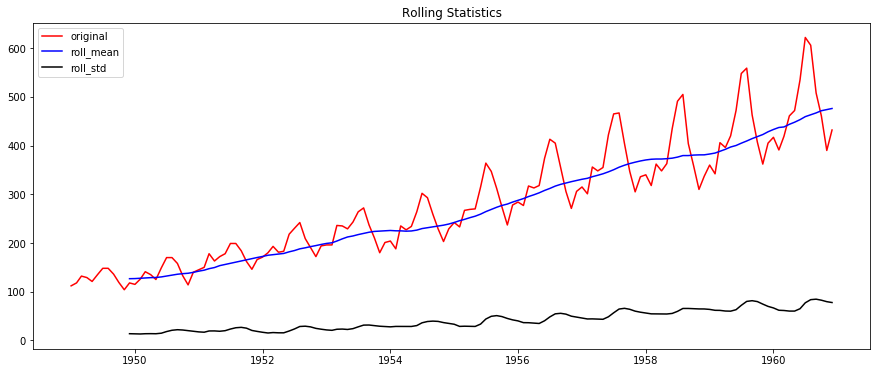

In [91]:
# plot rolling statistics to check for stationarity of time series

def test(time_series):
  roll_mean = df.rolling(window = 12).mean()
  roll_std = df.rolling(window = 12).std()

  plt.plot(df, color = 'red', label = 'original')
  plt.plot(roll_mean, color = 'blue', label = 'roll_mean')
  plt.plot(roll_std, color = 'black', label = 'roll_std')
  plt.legend(loc = 'best')
  plt.title("Rolling Statistics")

test(df)

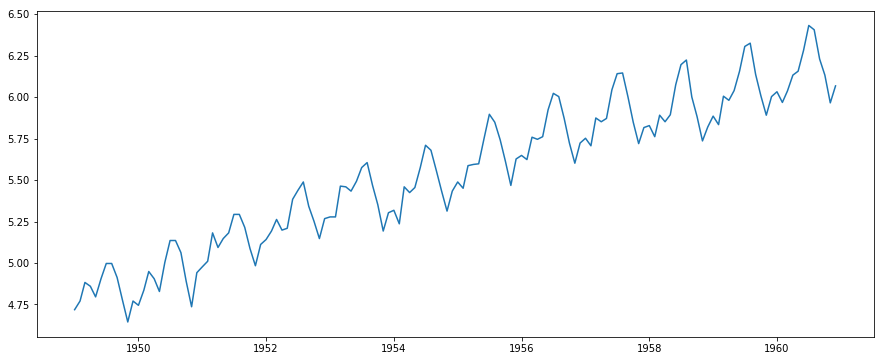

In [92]:
tt = np.log(df)
plt.plot(tt)

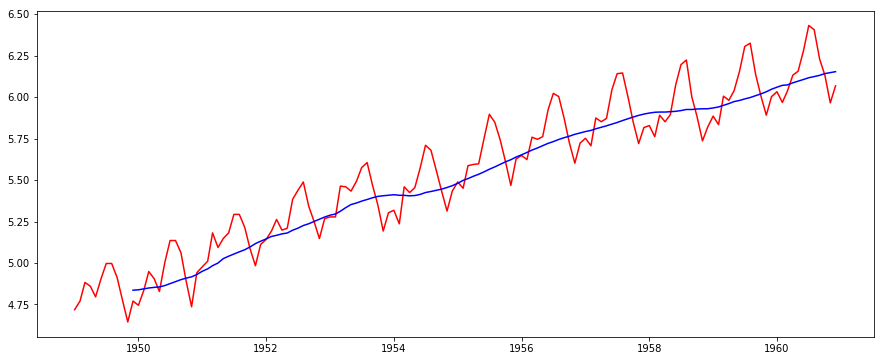

In [93]:
log_mean = tt.rolling(window = 12).mean()
plt.plot(tt,color = 'red', label = "log_version")
plt.plot(log_mean, color = 'blue', label = 'log_mean')

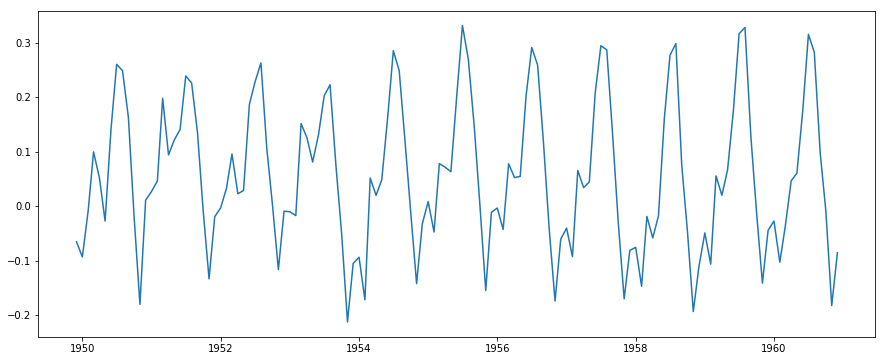

In [98]:
diff = tt-log_mean
plt.plot(diff)
diff.dropna(inplace = True)


Text(0.5, 1.0, 'Rolling Statistics')

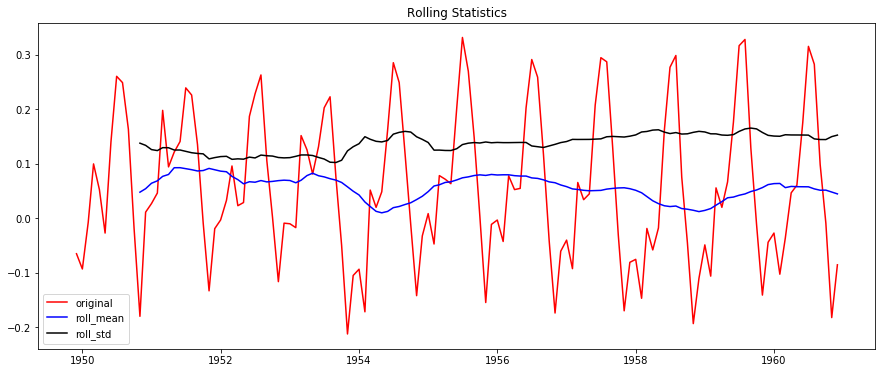

In [99]:

roll_mean = diff.rolling(window = 12).mean()
roll_std = diff.rolling(window = 12).std()

plt.plot(diff, color = 'red', label = 'original')
plt.plot(roll_mean, color = 'blue', label = 'roll_mean')
plt.plot(roll_std, color = 'black', label = 'roll_std')
plt.legend(loc = 'best')
plt.title("Rolling Statistics")

